In [1]:
import numpy as np
import mne
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.gaussian_process import GaussianProcessRegressor

In [2]:
# subject 0, night 0
file = "sleep-edf-database-expanded-1.0.0\sleep-cassette\SC4001E0-PSG.edf"
data = mne.io.read_raw_edf(file)
raw_data = data.get_data()
# metadata
info = data.info
channels = data.ch_names
print("Metadata: \n ", data)
print(info)
print("Channels: ", channels)
#print("raw_data size: ", raw_data.shape)
# extract each channel
EEG_Cz = raw_data[0]
EEG_Oz = raw_data[1]
EOG = raw_data[2]
Resp = raw_data[3]
EMG = raw_data[4]
Temp = raw_data[5]
Event = raw_data[6]
sf = 100.
time = np.arange(EEG_Cz.size) / sf

Extracting EDF parameters from c:\Users\flake\Documents\Homework\CSCI5622\Project Work\sleep-edf-database-expanded-1.0.0\sleep-cassette\SC4001E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Metadata: 
  <RawEDF | SC4001E0-PSG.edf, 7 x 7950000 (79500.0 s), ~12 kB, data not loaded>
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fpz-Cz, EEG Pz-Oz, EOG horizontal, Resp oro-nasal, EMG ...
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 100.0 Hz
 meas_date: 1989-04-24 16:13:00 UTC
 nchan: 7
 projs: []
 sfreq: 100.0 Hz
>
Channels:  ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal', 'Resp oro-nasal', 'EMG submental', 'Temp rectal', 'Event marker']


In [3]:
from sklearn import preprocessing

In [4]:
EEG_Oz.shape

(7950000,)

In [5]:
mod = GaussianProcessRegressor()
n = 10000
X = np.zeros(shape=(n,1))
for i in range(n):
    X[i,0]=time[i]
Y = np.zeros(shape=(n,1))
for i in range(n):
    Y[i]=EEG_Oz[i]
df = np.concatenate((X,Y),axis=1)

In [6]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(df, test_size=0.2, random_state=25)

In [7]:
def Rsquared(true, pred):
    num = []
    den = []
    meann = np.mean(true)
    for i in range(len(true)):
        num.append((true[i]-pred[i])**2)
        den.append((true[i]-meann)**2)
    return 1 - sum(num)/sum(den)

def MSE(true, pred):
    cals = []
    for i in range(len(true)):
        cals.append((true[i]-pred[i])**2)
    return np.mean(cals)

In [8]:
actual_training_data, validation_data = train_test_split(training_data, test_size=0.2, random_state=25)

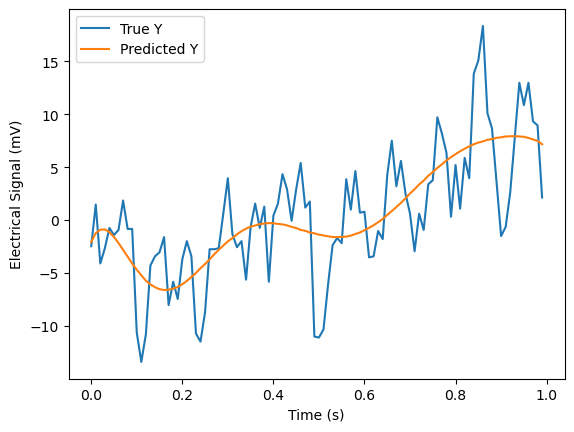

In [9]:
#Enough messing around
mod = GaussianProcessRegressor(alpha=10**(-12.5))
n = 100
X = np.zeros(shape=(n,1))
for i in range(n):
    X[i,0]=time[i]
Y = np.zeros(shape=(n,))
for i in range(n):
    Y[i]=EEG_Oz[i]
mod.fit(X,Y)
y_hat = mod.predict(X)
plt.plot(X,Y)
plt.plot(X,y_hat)
plt.xlabel('Time (s)')
plt.ylabel('Electrical Signal (mV)')
plt.legend(['True Y','Predicted Y'])

#Works pretty well

In [10]:
Rsquared(Y,y_hat)
MSE(Y,y_hat)

17.529807370031193

In [11]:
#Enough messing around
mod = GaussianProcessRegressor(alpha=10**(-12.5))
n = 10000
X = np.zeros(shape=(n,1))
for i in range(n):
    X[i,0]=time[i]
Y = np.zeros(shape=(n,))
for i in range(n):
    Y[i]=EEG_Oz[i]
mod.fit(X,Y)
y_hat = mod.predict(X)
plt.plot(X,Y)
plt.plot(X,y_hat)
plt.legend(['True Y','Predicted Y'])

#Works pretty well

KeyboardInterrupt: 

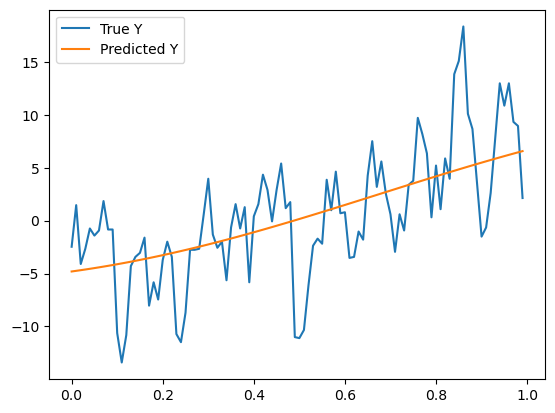

In [ ]:
mod = GaussianProcessRegressor(alpha=10**0)
n = 100
X = np.zeros(shape=(n,1))
for i in range(n):
    X[i,0]=time[i]
Y = np.zeros(shape=(n,))
for i in range(n):
    Y[i]=EEG_Oz[i]
mod.fit(X,Y)
y_hat = mod.predict(X)
plt.plot(X,Y)
plt.plot(X,y_hat)
plt.legend(['True Y','Predicted Y'])

#Works pretty well

In [ ]:
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import Matern

c:\Users\flake\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


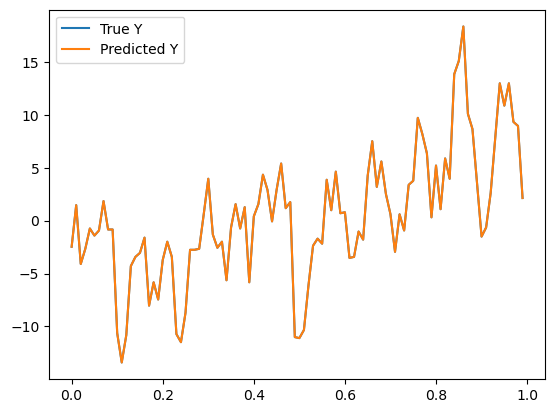

In [ ]:
kernel = 1.0 * Matern(length_scale=1.0, nu=1.5)
mod = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=1, random_state=0, alpha=3e-13)
n = 100
X = np.zeros(shape=(n,1))
for i in range(n):
    X[i,0]=time[i]
Y = np.zeros(shape=(n,))
for i in range(n):
    Y[i]=EEG_Oz[i]
mod.fit(X,Y)
y_hat = mod.predict(X)
plt.plot(X,Y)
plt.plot(X,y_hat)
plt.legend(['True Y','Predicted Y'])

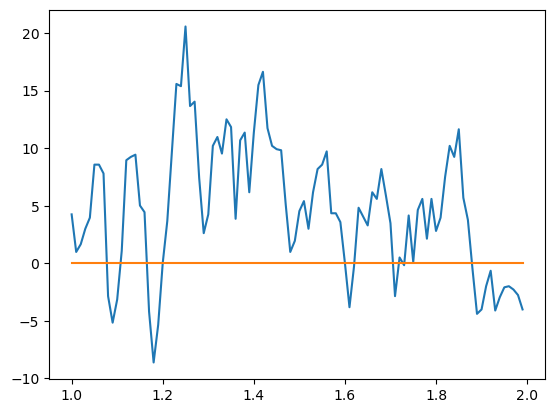

In [ ]:
X = np.zeros(shape=(n,1))
for i in range(n,2*n):
    X[i-n,0]=time[i]
for i in range(n,2*n):
    Y[i-n]=EEG_Oz[i]
y_hat = mod.predict(X)
plt.plot(X,Y)
plt.plot(X,y_hat)

In [ ]:
Rsquared(Y,y_hat)

-0.6837146465910613

In [3]:
import csv

In [4]:
EEG_Cz = raw_data[0]
EEG_Oz = raw_data[1]
EOG = raw_data[2]

In [5]:
EOG

array([1.65086691e-05, 1.60158730e-05, 9.60952381e-06, ...,
       6.97306471e-05, 8.05721612e-05, 1.02255189e-04])

In [7]:
with open('fullnightofdata.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for i in range(len(EEG_Cz)):
        spamwriter.writerow([EEG_Cz[i], EEG_Oz[i], EOG[i]])

In [21]:
print(len(EEG_Cz))
print(len(EEG_Oz))
print(len(EOG))

7950000
7950000
7950000


In [24]:
i = 13
print(EEG_Cz[i])
print(EEG_Oz[i])
print(EOG[i])

-2.6725274725274728e-06
-4.290842490842479e-06
-6.159951159951108e-06
